In [11]:
!pip install tensorflow
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.4 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

2023-11-07 13:21:42.886255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 13:21:42.957334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 13:21:42.957393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 13:21:42.957439: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 13:21:42.966237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 13:21:42.967226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
celsius_q = np.array( [-40, -10, 0, 8, 15, 22, 38], dtype = float )
fahrenheit_a = np.array( [-40, 14, 32, 46, 59, 72, 100], dtype = float )

for i, c in enumerate( celsius_q ):
  print( "{} degrees Celsius = {} degrees Fahrenheit".format( c, fahrenheit_a[i] ) )

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [5]:
l0 = tf.keras.layers.Dense( units = 1, input_shape = [1] )

In [6]:
model = tf.keras.Sequential([l0])

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( units = 1, input_shape = [1] )
])

In [8]:
model.compile( loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam( 0.1 ) )

In [9]:
history = model.fit( celsius_q, fahrenheit_a, epochs = 500, verbose = False )
print("Finished training the model")

Finished training the model


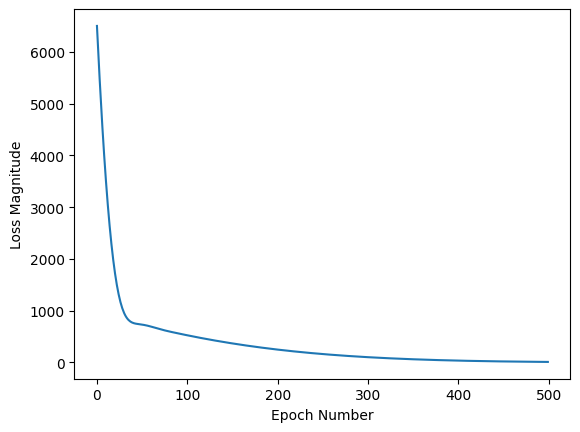

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [13]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 196ms/step
[[211.28937]]


In [14]:
print('These are the layer variables: {}'.format(l0.get_weights()))

These are the layer variables: [array([[-0.74231994]], dtype=float32), array([0.], dtype=float32)]


In [15]:
l0 = tf.keras.layers.Dense( units = 4, input_shape=[1] )
l1 = tf.keras.layers.Dense( units = 4 )
l2 = tf.keras.layers.Dense( units = 1 )
model = tf.keras.Sequential( [ l0, l1, l2 ] )
model.compile( loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam( 0.1 ) )
model.fit( celsius_q, fahrenheit_a, epochs = 500, verbose = False )
print( "Finished training the model" )
print( model.predict( [100.0] ) )
print( "Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format( model.predict( [100.0] ) ) )
print( "These are the L0 variables: {}".format(l0.get_weights()))
print( "These are the L1 variables: {}".format(l1.get_weights()))
print( "These are the L2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 173ms/step
[[211.74744]]
1/1 [==============================] - 0s 60ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the L0 variables: [array([[ 0.82189214,  0.03179995, -0.37510902, -0.44168055]],
      dtype=float32), array([ 3.506976 ,  3.1954854,  2.2753713, -3.3883133], dtype=float32)]
These are the L1 variables: [array([[-1.1191453 , -0.19786303,  0.5053965 ,  0.5863324 ],
       [-1.4495541 ,  0.25911748,  0.14378826, -0.7483046 ],
       [-0.19435683, -1.0803574 ,  0.7132224 ,  0.73620886],
       [ 0.14830522,  0.20123424, -1.2831116 ,  0.7906661 ]],
      dtype=float32), array([-3.3728027 , -0.71251583,  3.3655891 , -2.040382  ], dtype=float32)]
These are the L2 variables: [array([[-1.0383062 ],
       [-0.36304447],
       [ 1.1446881 ],
       [-0.2291773 ]], dtype=float32), array([3.2189221], dtype=float32)]
